In [ ]:
# Colab에 Mecab 설치 출처:https://wikidocs.net/94748
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.8MB/s 
     |████████████████████████████████| 450kB 25.6MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-14 04:02:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::22c2:513, ...
Conn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt
import io
df=pd.read_csv('/content/drive/My Drive/your address',  error_bad_lines=False)
df.head(10)

,Unnamed: 0,Place,Address,Name,Review,Date,Score
0,0,전주 한옥 마을,-,diditall,전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...,2021년 5월 25일,4.0
1,1,전주 한옥 마을,-,hyun,"젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고...",2021년 5월 6일,4.0
2,2,전주 한옥 마을,-,l*alalala,한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기...,2021년 5월 4일,3.0
3,3,전주 한옥 마을,-,ashurei2000,전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...,2020년 9월 18일,4.0
4,4,전주 한옥 마을,-,blessmj,첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치 그...,2020년 5월 28일,5.0
5,5,전주 한옥 마을,-,사장님,전주 한옥마을을 평일에 갔더니 한산하니 좋았어요.길에 쓰레기 하나 없이 너무 깨끗했...,2020년 2월 4일,3.0
6,6,전주 한옥 마을,-,composuretour,명절 긴 이동거리를 고려하여 중간 휴식지로 전주 한옥마을을 선택명절 직전 한옥 마을...,2020년 1월 29일,3.0
7,7,전주 한옥 마을,-,Oh!,한옥마을 거리가 온통 가게들로 바뀌었네요. 사람이 북적거리는 건 좋은데 고즈넉한 맛...,2020년 1월 14일,3.0
8,8,전주 한옥 마을,-,panclass,"오랜만에 가봤는 데, 깨끗하게 관리 되고 있는 듯 보였고, 이쁜 한복체험하는 곳도 ...",2020년 1월 2일,5.0
9,9,전주 한옥 마을,-,ahirity,전주에 내려간 여행객들이 모두 모이는 곳이다. 먹자거리가 형성되어 있어서 길을 걷다...,2019년 12월 9일,4.0


In [ ]:

#total_data = pd.read_table('/content/drive/My Drive/sundo soft/tripA_reivew_Attraction_전주.csv', names=['Review', 'Score'])
total_data=df[['Review', 'Score']]
total_data.head()

,Review,Score
0,전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...,4.0
1,"젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고...",4.0
2,한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기...,3.0
3,전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...,4.0
4,첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치 그...,5.0


In [ ]:
print(total_data.isnull().values.any())

False


In [ ]:
#total_data['Score']= total_data['Score'].replace(['1.0','2.0','3.0','4.0','5.0'],['NEG','NEG','NUT','POS','POS'])

In [ ]:
df_negative = total_data[(total_data.Score == '1.0') | (total_data.Score == '2.0')].copy()
df_negative['label'] = 0
df_negative.head()

,Review,Score,label
28,외국인 친구들을 데리고 방문하였습니다. 저도 전주한옥마을이 처음이라 내심 기대를 하...,1.0,0
33,외국인 친구들을 데리고 방문하였습니다. 저도 전주한옥마을이 처음이라 내심 기대를 하...,1.0,0
35,전주하면 떠오르는 장소임에도 불구하고전주스럽지 않는 곳이 되어버려 아쉽다.어디서나 ...,1.0,0
38,정말 왜 와야 하는지 모르겠다고 생각든 곳입니다.한복 입어보러 오겠다면... 그럴 ...,1.0,0
40,전주하면 떠오르는 장소임에도 불구하고전주스럽지 않는 곳이 되어버려 아쉽다.어디서나 ...,1.0,0


In [ ]:
df_neutral = total_data[total_data.Score == '3.0'].copy()
df_neutral['label'] = 1
df_neutral.head()

,Review,Score,label
2,한복입고 사진찍긴 좋아요거리음식거리라서 먼가 특별하다 싶지 않아요물론 처음가서 보기...,3.0,1
5,전주 한옥마을을 평일에 갔더니 한산하니 좋았어요.길에 쓰레기 하나 없이 너무 깨끗했...,3.0,1
6,명절 긴 이동거리를 고려하여 중간 휴식지로 전주 한옥마을을 선택명절 직전 한옥 마을...,3.0,1
7,한옥마을 거리가 온통 가게들로 바뀌었네요. 사람이 북적거리는 건 좋은데 고즈넉한 맛...,3.0,1
10,전주 한옥마을을 평일에 갔더니 한산하니 좋았어요.길에 쓰레기 하나 없이 너무 깨끗했...,3.0,1


In [ ]:
df_positive = total_data[(total_data.Score == '4.0') | (total_data.Score == '5.0')].copy()
df_positive['label'] = 2
df_positive.head()

,Review,Score,label
0,전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...,4.0,2
1,"젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고...",4.0,2
3,전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...,4.0,2
4,첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치 그...,5.0,2
8,"오랜만에 가봤는 데, 깨끗하게 관리 되고 있는 듯 보였고, 이쁜 한복체험하는 곳도 ...",5.0,2


In [ ]:
tdf = pd.concat([df_positive,df_neutral,df_negative])
print(tdf)

                                                Review Score  label
0    전주가면 무조건 가봐야하는곳한옥하나하나 너무 멋지고 잘 꾸며져 있어요그러나 길거리 ...   4.0      2
1    젊음의 거리, 사진찍는 거리입니다. 저렴하게 빌리는 옷 덕분에 여기 저기 한복 입고...   4.0      2
3    전주여행을 생각한다면 꼭 한번 가게되는 곳이라고 생각합니다.한옥을 보는 재미도 있지...   4.0      2
4    첫째날은 사람구경둘째날은 먹거리 먹고 꽃구경 셋째날은 세세한 곳 소리관 김치   그...   5.0      2
8    오랜만에 가봤는 데, 깨끗하게 관리 되고 있는 듯 보였고, 이쁜 한복체험하는 곳도 ...   5.0      2
..                                                 ...   ...    ...
502  버스터미널에서 5분거리에 위치해있어 전북대학교를 방문하는 길에 잠시 스쳐지나갔던 곳...   2.0      0
636  시설면에나 운영면에서 아쉬운접이 많았습니다.조금더 시의 지원을 받았으면 합니다.의자...   2.0      0
680  주말인데도 가게들이 드문드문 문을 열고 영업하며, 활력이 전혀 없어 이미 쇠락한 느...   2.0      0
684  알쓸신잡 보고 기대하고 갔어요. 일단 아기자기하게 이쁜 가게들이 많아보였지만 평일이...   2.0      0
691  침대방 들어갈 수 있는 사람은 팔목에 띠를 착용 한 사람만 들어 갈 수 있음1번 침...   1.0      0

[759 rows x 3 columns]


In [ ]:
print(tdf.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(tdf, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 569
테스트용 리뷰의 개수 : 190


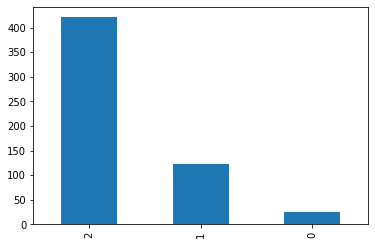

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0     26
1      1    122
2      2    421


In [ ]:
train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Review'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

Review    0
Score     0
label     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
test_data.drop_duplicates(subset = ['Review'], inplace=True) # 중복 제거
test_data['Review'] = test_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['Review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만', '게임', '겜', '되', '음', '면']

In [ ]:
mecab = Mecab() 

train_data['tokenized'] = train_data['Review'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])
test_data['tokenized'] = test_data['Review'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_data.head()

,Review,Score,label,tokenized
563,밤에는 인적이 드물어서 혼자 가시는건 추천드리고 싶지 않습니다만 하천과 어우러져서 ...,5.0,2,"[밤, 인적, 드물, 어서, 혼자, 가시, 건, 추천, 드리, 싶, 않, 습니다, ..."
644,땅끝마을 내려가다가 인터체인지가 있어서 급 방문했고 아이에게 교육상 들렀는데 별로네...,3.0,1,"[땅, 끝, 마을, 내려가, 다가, 인터체인지, 있, 어서, 급, 방문, 했, 아이..."
305,지방엘 가면 주로 박물관에 드리는데 특별한 박물관이라기 보다 그냥 일반적인 박물관이...,3.0,1,"[지방, 엘, 주로, 박물관, 드리, 는데, 특별, 박물관, 라기, 보다, 그냥, ..."
79,비오는 날 방문했는데 그나마 사람이 적어서 나았어요 그래도 한옥마을은 언제 방문해도...,4.0,2,"[비오, 날, 방문, 했, 는데, 그나마, 사람, 적, 어서, 나, 았, 어요, 그..."
711,복분자와 풍천 장어로 유명한 고창 선운사사실 복분자와 장어보단 선운사 그 자체가 고...,5.0,2,"[복분자, 풍천, 장어, 로, 유명, 고창, 선운사, 사실, 복분자, 장어, 보단,..."


In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
neutral_words = np.hstack(train_data[train_data.label == 1 ]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 2]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('있', 26), ('없', 19), ('곳', 19), ('사람', 15), ('어', 13), ('수', 13), ('겠', 11), ('에서', 10), ('서', 8), ('전주', 8), ('나', 8), ('으로', 8), ('찍', 8), ('한옥', 7), ('많', 7), ('입니다', 7), ('습니다', 7), ('적', 7), ('않', 7), ('로', 7)]


In [ ]:
neutral_word_count = Counter(neutral_words)
print(neutral_word_count.most_common(20))

[('있', 154), ('습니다', 81), ('좋', 69), ('곳', 61), ('전주', 55), ('었', 53), ('많', 50), ('않', 49), ('한옥마을', 48), ('어요', 47), ('것', 46), ('적', 43), ('어', 42), ('지만', 42), ('수', 41), ('마을', 40), ('기', 40), ('으로', 39), ('한옥', 37), ('없', 36)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('있', 589), ('좋', 306), ('습니다', 242), ('곳', 236), ('기', 206), ('수', 195), ('어', 168), ('것', 161), ('에서', 150), ('보', 147), ('입니다', 143), ('많', 139), ('으로', 139), ('었', 129), ('지만', 129), ('전주', 128), ('한옥마을', 120), ('어요', 118), ('로', 117), ('어서', 96)]


긍정 리뷰의 평균 길이 : 37.72446555819477
중립 리뷰의 평균 길이 : 41.131147540983605
부정 리뷰의 평균 길이 : 39.34615384615385


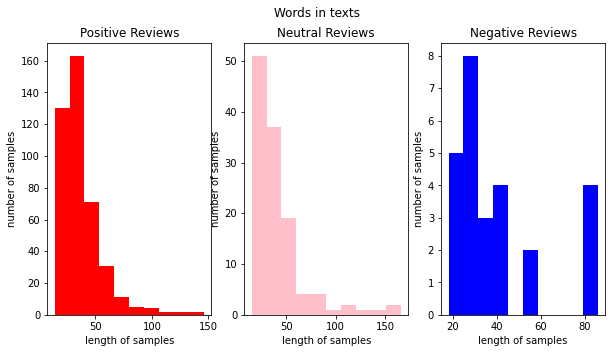

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
text_len = train_data[train_data['label']==2]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']== 1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='pink')
ax2.set_title('Neutral Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('중립 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']== 0]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='blue')
ax3.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 3296
등장 빈도가 1번 이하인 희귀 단어의 수: 1414
단어 집합에서 희귀 단어의 비율: 42.900485436893206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.44984719244629


In [ ]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)
vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1884
단어 집합의 크기 : 3296


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[:3])

[[136, 1190, 770, 22, 397, 232, 169, 50, 564, 78, 21, 4, 1191, 916, 398, 233, 4, 565, 1192, 1193, 9, 25, 30, 101, 44, 250, 15, 120], [1884, 323, 32, 1885, 234, 1886, 2, 22, 1194, 33, 35, 65, 151, 284, 354, 771, 34, 197, 47, 1195, 1196, 1887, 67, 566, 399, 70, 355, 917, 28, 400, 1888, 152, 8, 2, 22, 567, 771, 234, 568, 4], [658, 1889, 443, 60, 564, 34, 285, 60, 1197, 89, 142, 772, 24, 60, 217, 79]]


리뷰의 최대 길이 : 166
리뷰의 평균 길이 : 38.528998242530754


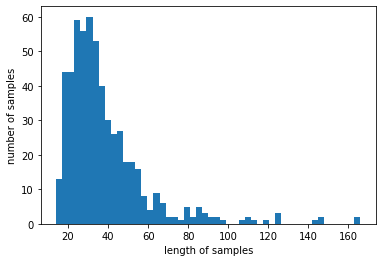

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 130
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 130 이하인 샘플의 비율: 99.12126537785588


In [ ]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [ ]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=1000, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/1000
15/15 [==============================] - 8s 266ms/step - loss: -6.4288 - acc: 0.2242 - val_loss: -14.9418 - val_acc: 0.1404

Epoch 00001: val_acc improved from -inf to 0.14035, saving model to best_model.h5
Epoch 2/1000
15/15 [==============================] - 3s 202ms/step - loss: -14.5017 - acc: 0.2330 - val_loss: -19.2948 - val_acc: 0.1404

Epoch 00002: val_acc did not improve from 0.14035
Epoch 3/1000
15/15 [==============================] - 3s 207ms/step - loss: -17.5236 - acc: 0.2330 - val_loss: -22.2878 - val_acc: 0.1404

Epoch 00003: val_acc did not improve from 0.14035
Epoch 4/1000
15/15 [==============================] - 3s 212ms/step - loss: -19.9186 - acc: 0.2330 - val_loss: -24.9542 - val_acc: 0.1404

Epoch 00004: val_acc did not improve from 0.14035
Epoch 5/1000
15/15 [==============================] - 3s 204ms/step - loss: -22.0826 - acc: 0.2330 - val_loss: -27.3038 - val_acc: 0.1404

Epoch 00005: val_acc did not improve from 0.14035
Epoch 6/1000
15/15 [====

In [ ]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 [==============================] - 1s 39ms/step - loss: -13.3639 - acc: 0.2147
테스트 정확도: 0.2147
